# readme
descrip: plot bathymetrty bias (HR and LR minus ETOPO5 bathymetry) contours in the North Atlantic <br>

update history: <br>
v1.0 DL 2021Mar30 <br>
v1.1 DL 2021Apr05 <br>
v1.2 DL 2021Apr25 <br>
v1.3 DL 2021Apr27 <br>
v1.4 DL 2021May11 make publication-ready pic <br>
v1.5 DL 2021May21 combine steric height increases and bathymetry bias into one fig <br>
v1.6 DL 2021Jun04 pivot to CESM-HR special volume paper <br>

extra notes: <br>
Fig 8 of the CESM-HR special volume paper <br>

# import modules

In [1]:
# general python packages
import numpy as np
import xarray as xr
# import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import proplot as plot
import cartopy
cartopy.config['pre_existing_data_dir']='/ihesp/shared/cartopy_features'
# import cartopy.crs as ccrs
# from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# from mpl_toolkits.axes_grid1 import AxesGrid

# python GCM(POP) packages
# import xgcm
# import pop_tools
# import xesmf as xe

# from eofs.xarray import Eof

# dask jupyter lab packages
# from dask.distributed import Client
# from dask.distributed import performance_report

# file name with time packages
# from itertools import product
# from cftime import DatetimeNoLeap

# incorporate dask 

In [2]:
# client = Client("tcp://10.73.2.190:34946")
# client

# define parameters and load files

In [3]:
chunks_HR = {'nlat':800,'nlon':900}
chunks_LR = {'nlat':384,'nlon':320}

# North Atlantic
# lat, lon ranges and nlat, nlon ranges for t12 and g16 grids, nlat and nlon ranges are slightly larger than lat and lon ranges. 
lon1, lon2 = -100, -40
lat1, lat2 = 10, 57

nlon1_t12, nlon2_t12 = 50, 800
nlat1_t12, nlat2_t12 = 1200, 2100

nlon1_g16, nlon2_g16 = 260, 321
nlat1_g16, nlat2_g16 = 200, 370

# === Gulf of Maine (GMa) ===
# lat1_GMa, lat2_GMa = 35, 55
# lon1_GMa, lon2_GMa = -75, -50 # GMa: Gulf of Maine

lon1b_GMa, lon2b_GMa = -73, -63  # b: box, highlight region with a box 
lat1b_GMa, lat2b_GMa = 39, 47
# ===========================


# === Gulf of Maxico (GMe) ===
lon1_GMe, lon2_GMe = -88, -78
lat1_GMe, lat2_GMe = 20, 28
# ============================

outdir='/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/pics/'
pic1 = outdir + 'BathymetryContourGulfMaineMexico_2021Jun17.png'

In [4]:
infile0_HR = ('/ihesp/archive/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02/ocn/'
              'B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0250-01.nc')
ds0_HR = xr.open_dataset(infile0_HR)
ds0_NA_HR = ds0_HR.isel(nlon=slice(nlon1_t12, nlon2_t12),nlat=slice(nlat1_t12, nlat2_t12)) 

infile0_LR = ('/ihesp/archive/B.E.13.BHISTC5.ne30g16.sehires38.003.sunway/ocn/monthly/'
              'cmpr_B.E.13.BHISTC5.ne30g16.sehires38.003.sunway.pop.h.1850-01.nc')
ds0_LR = xr.open_dataset(infile0_LR)
ds0_NA_LR = ds0_LR.isel(nlon=slice(nlon1_g16, nlon2_g16),nlat=slice(nlat1_g16, nlat2_g16)) 

infile_etopo = '/ihesp/user/dapengli/obs_dat/bathymetry_ETOPO5_2021Apr27/data.nc'
ds_etopo = xr.open_dataset(infile_etopo)
ds_etopo

ds_etopo_rn = ds_etopo.rename({'X': 'lon', 'Y': 'lat'}) # rn: rename
ds_etopo_rn

<xarray.Dataset>
Dimensions:  (lat: 2160, lon: 4320)
Coordinates:
  * lon      (lon) float32 0.0 0.08333 0.1667 0.25 ... 359.7 359.8 359.8 359.9
  * lat      (lat) float32 90.0 89.92 89.83 89.75 ... -89.75 -89.83 -89.92
Data variables:
    elev     (lat, lon) int16 ...

read POP grids files for regriding

In [5]:
# infile_g16 = ('/ihesp/user/dapengli/Projects4iHESP/'
# 'SupplementaryFiles4POP/POPgrids_gx1v6_2020Jun29.nc') # POP g16 grid file
# ds_g16 = xr.open_dataset(infile_g16)
# ds_NA_g16 = ds_g16.isel(nlon=slice(nlon1_g16, nlon2_g16),nlat=slice(nlat1_g16, nlat2_g16))


# infile_t12 = ('/ihesp/user/dapengli/Projects4iHESP/'
# 'SupplementaryFiles4POP/POPgrids_tx0.1v2_2020Jun29.nc') # POP t12 grid file
# ds_t12 = xr.open_dataset(infile_t12)
# ds_NA_t12 = ds_t12.isel(nlon=slice(nlon1_t12, nlon2_t12),nlat=slice(nlat1_t12, nlat2_t12))

# ds0_g16_rn = ds0_g16.rename({'TLONG': 'lon', 'TLAT': 'lat'}) # rn: rename
# ds0_t12_rn = ds0_t12.rename({'TLONG': 'lon', 'TLAT': 'lat'})

# data analysis

<xarray.DataArray 'elev' (lat: 2160, lon: 4320)>
array([[4290., 4290., 4290., ..., 4290., 4290., 4290.],
       [4288., 4288., 4288., ..., 4288., 4288., 4288.],
       [4288., 4288., 4288., ..., 4287., 4287., 4287.],
       ...,
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan]])
Coordinates:
  * lon      (lon) float32 0.0 0.08333 0.1667 0.25 ... 359.7 359.8 359.8 359.9
  * lat      (lat) float32 90.0 89.92 89.83 89.75 ... -89.75 -89.83 -89.92
Attributes:
    units:           m
    long_name:       elevation/bathymetry
    maxncolor:       253
    CS:              -9964.0
    CE:              7964.0
    ncolor:          253
    scale_min:       -9964.0
    scale_max:       7964.0
    colormap:        [0 1973790 4026644 [4026644 28] 9125192 [9125192 28] [15...
    colorscalename:  topographycolorscale

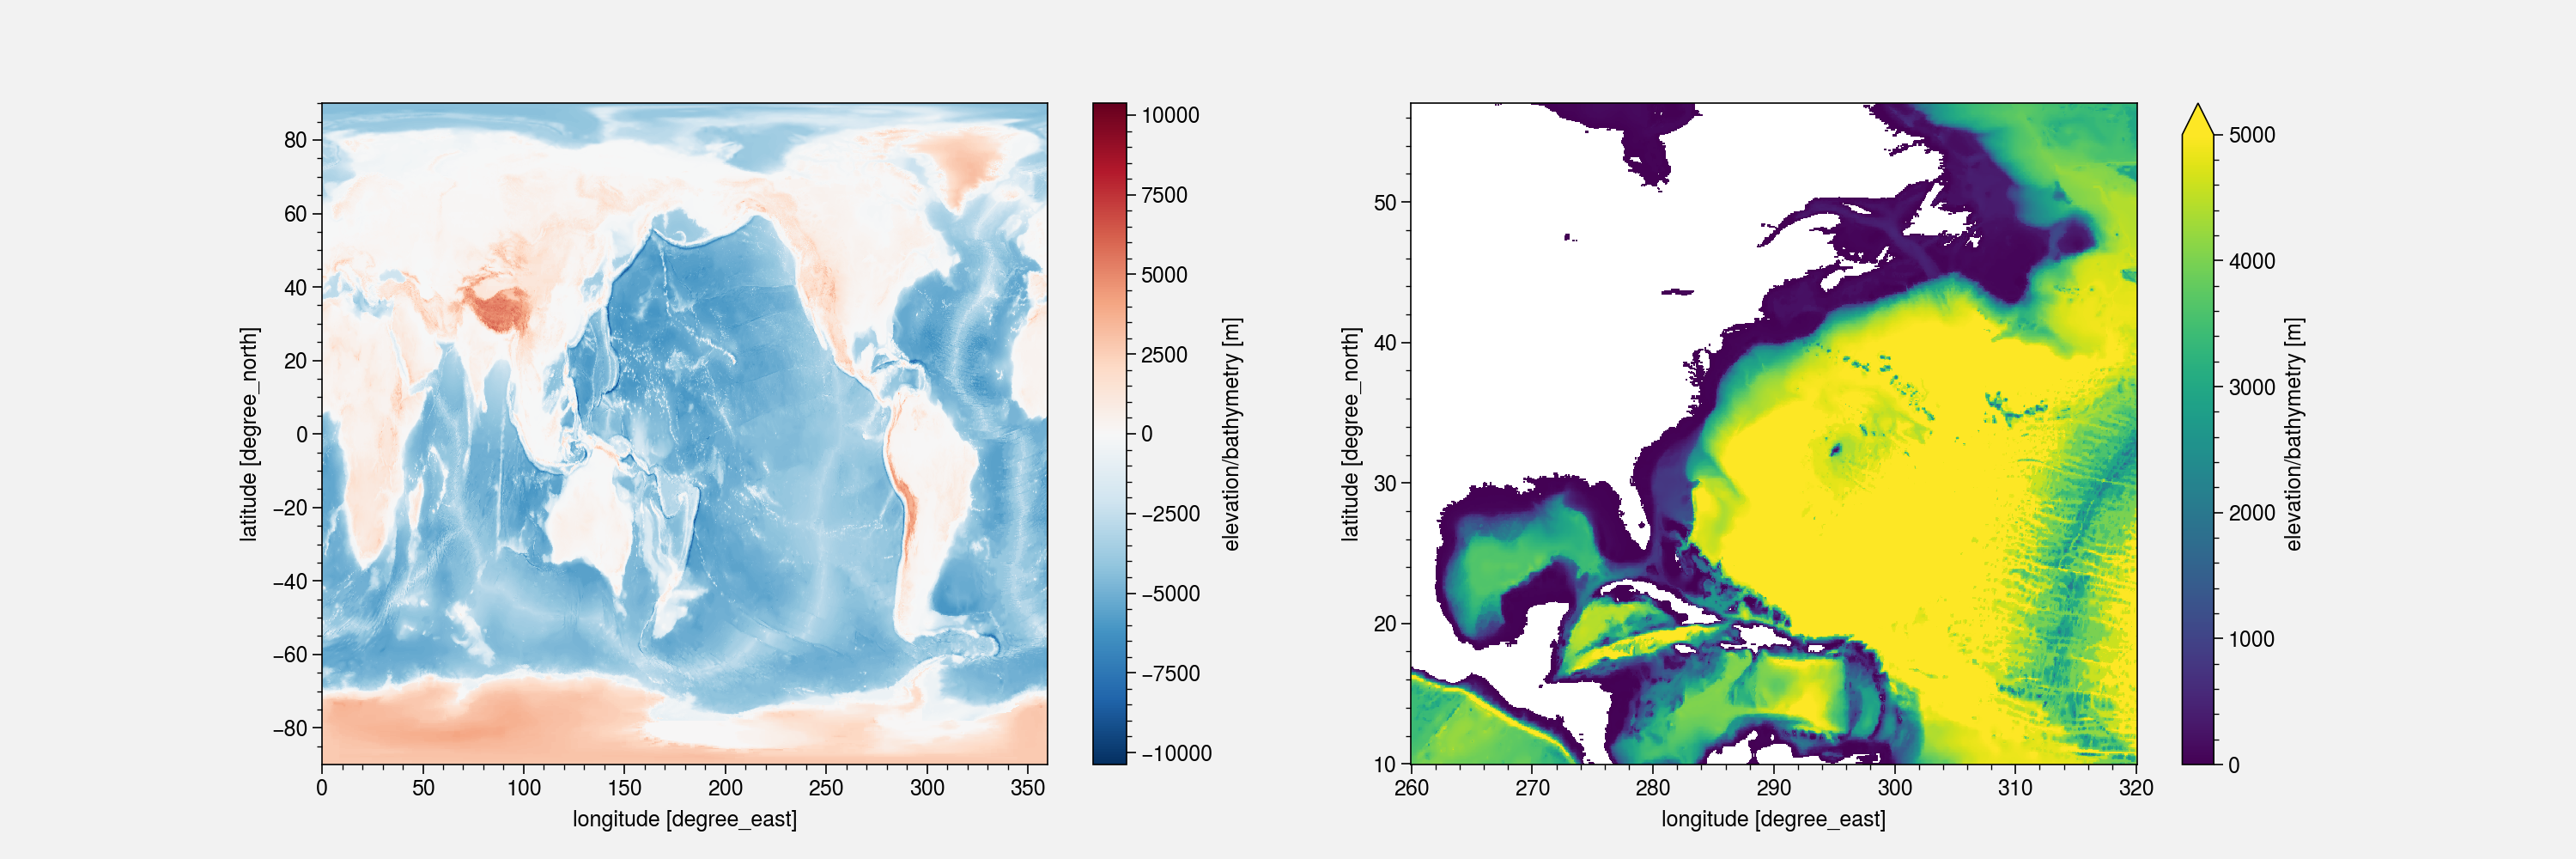

In [6]:
bathy_etopo=ds_etopo_rn.elev
bathy_etopo=-bathy_etopo.where(ds_etopo_rn.elev<0,np.nan) 
# mask land topo as nan, make bathy positive values

bathy_NA_etopo = bathy_etopo.sel(lon=slice(lon1+360,lon2+360),
                                 lat=slice(lat2,lat1))

fig, axs = plt.subplots(1,2,figsize=(15,5))
ds_etopo.elev.plot(ax=axs[0])
bathy_NA_etopo.plot(ax=axs[1],vmin=0,vmax=5000)
bathy_etopo

regrid ETOPO5 5-min bathymetry to t12 and g16 grids

In [7]:
# weightfile_std5min_t12deg = ('/scratch/user/dapengli/Projects4iHESP/'
#                        'Project_SeaLevelUSEastCoast_2021Mar30/python_scripts/'
#                        'bilinear_std5min_t12_Global_periodic_2021May21.nc')
# regridder_std5min_t12deg = xe.Regridder(ds_etopo_rn, ds0_t12_rn, method='bilinear', 
#                                     periodic=True, filename=weightfile_std5min_t12deg, 
#                                     reuse_weights=True)

# bathy_etopo_t12 = regridder_std5min_t12deg(bathy_etopo)
# bathy_etopo_t12

# weightfile_std5min_g16deg = ('/scratch/user/dapengli/Projects4iHESP/'
#                        'Project_SeaLevelUSEastCoast_2021Mar30/python_scripts/'
#                        'bilinear_std5min_g16_Global_periodic_2021May21.nc')
# regridder_std5min_g16deg = xe.Regridder(ds_etopo_rn, ds0_g16_rn, method='bilinear', 
#                                     periodic=True, filename=weightfile_std5min_g16deg, 
#                                     reuse_weights=True)

# bathy_etopo_g16 = regridder_std5min_g16deg(bathy_etopo)
# bathy_etopo_g16

In [8]:
# dpbathy_t12Mobs = (ds0_HR.HT/100 - bathy_etopo_t12)#/bathy_etopo_t12 # dp: difference in percentage, unit: [m], M: minus
# dpbathy_NA_t12Mobs = dpbathy_t12Mobs.isel(nlon=slice(nlon1_t12, nlon2_t12),nlat=slice(nlat1_t12, nlat2_t12))

# dpbathy_g16Mobs = (ds0_LR.HT/100 - bathy_etopo_g16)#/bathy_etopo_g16 # dp: difference in percentage, unit: [m], M: minus
# dpbathy_NA_g16Mobs = dpbathy_g16Mobs.isel(nlon=slice(nlon1_g16, nlon2_g16),nlat=slice(nlat1_g16, nlat2_g16))
# dpbathy_NA_g16Mobs

# make pics

/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/proplot/figure.py:1158: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  return super().colorbar(*args, cax=cax, **kwargs)
/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/proplot/figure.py:1158: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  return super().colorbar(*args, cax=cax, **kwargs)


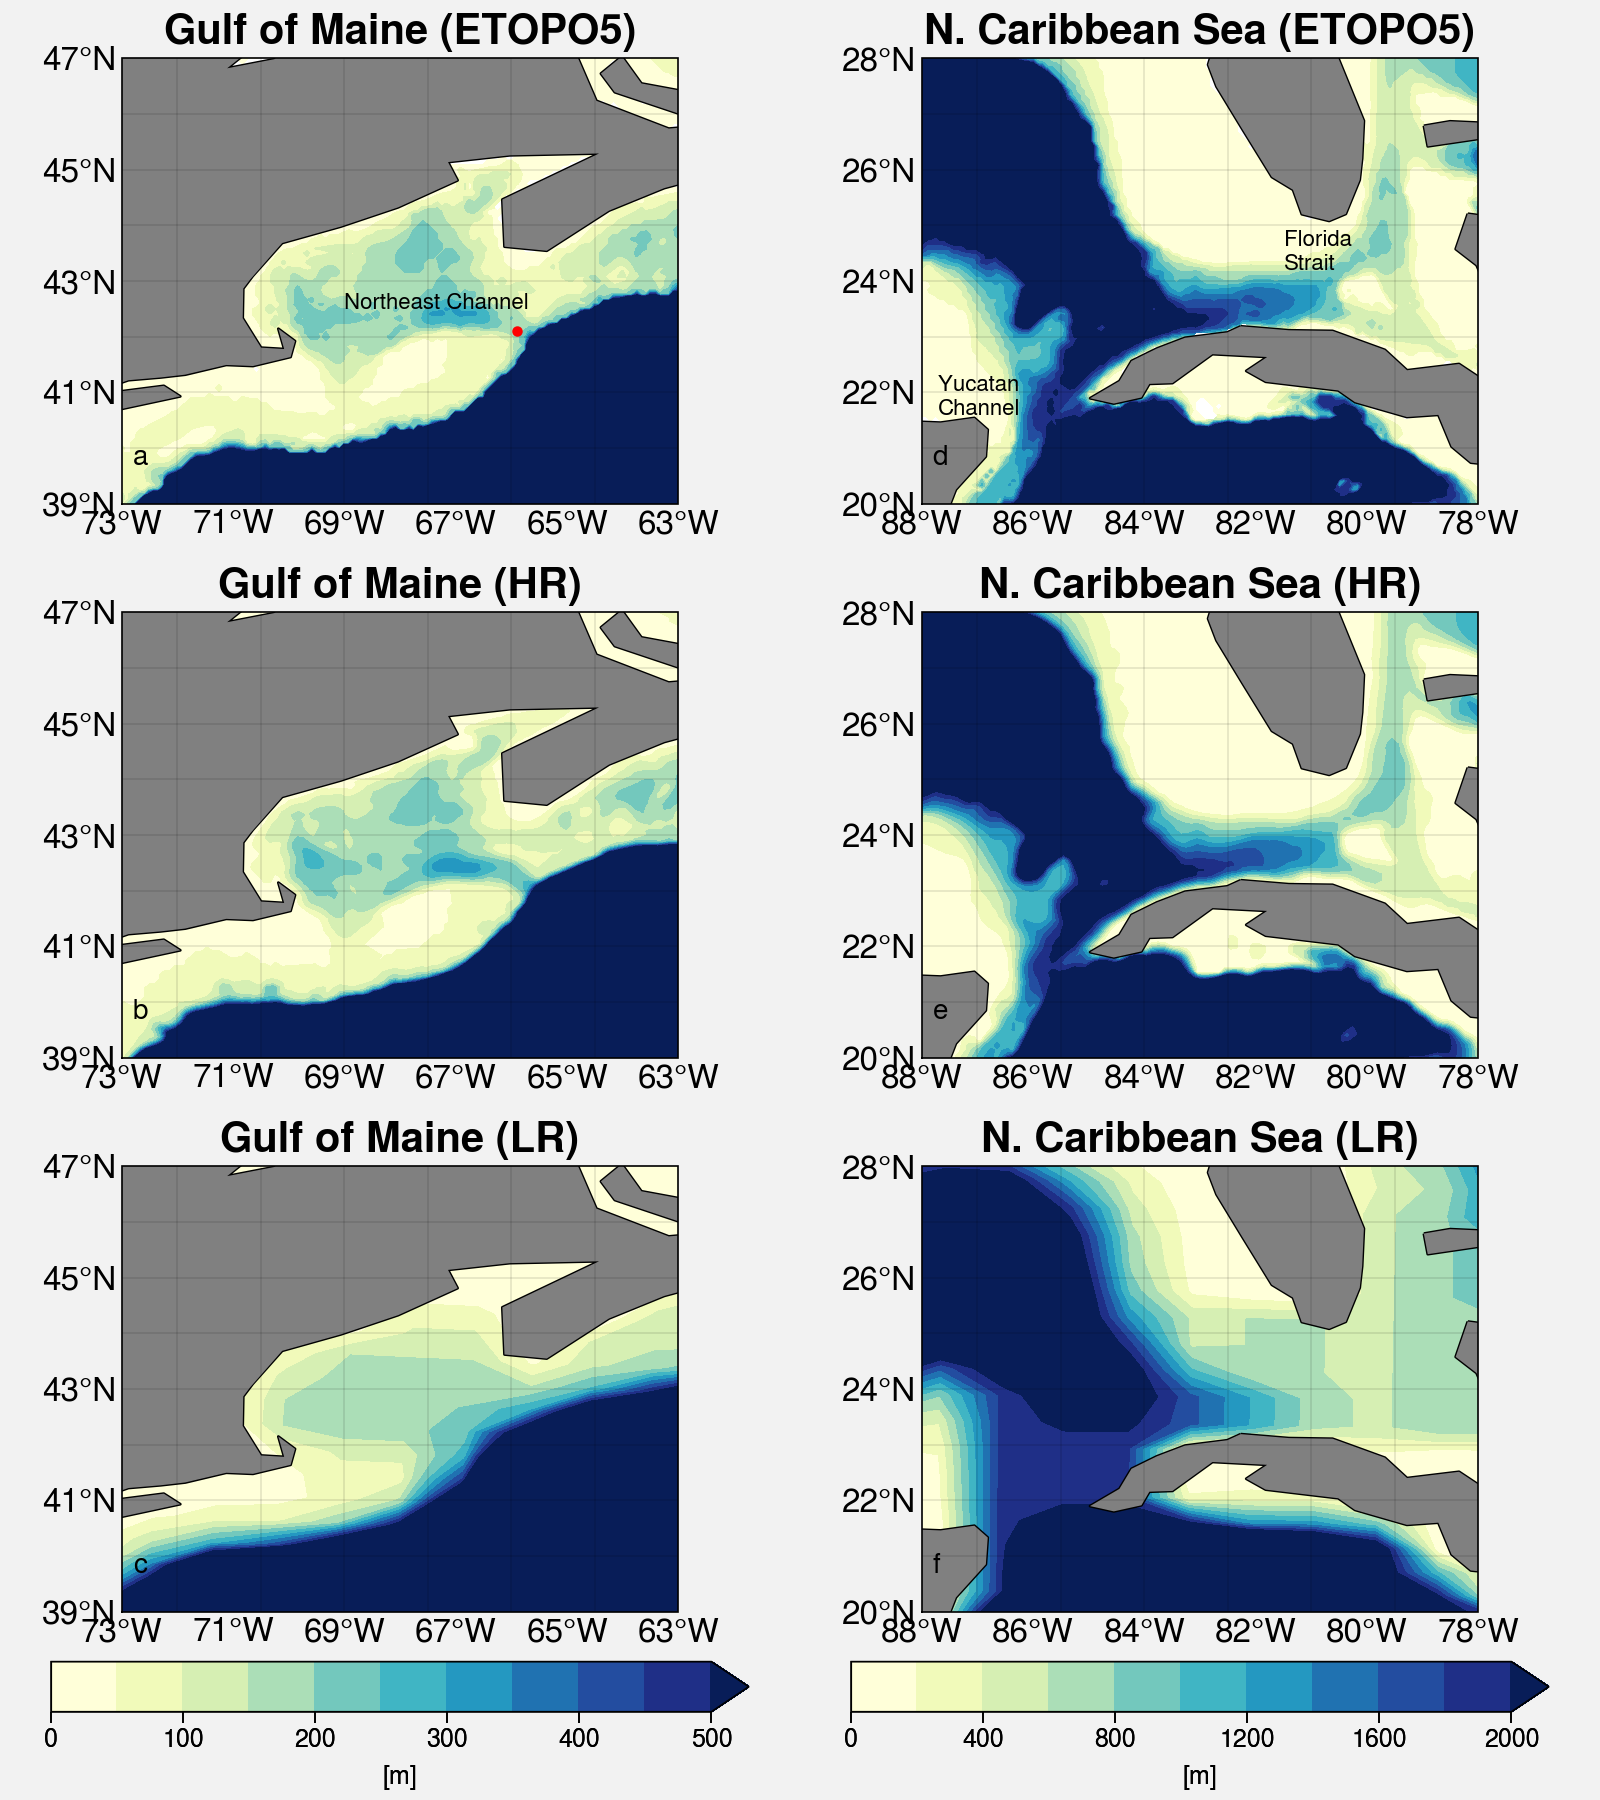

In [9]:
pc = cartopy.crs.PlateCarree()
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()

fig1, axs = plot.subplots(nrows=3,ncols=2,proj='cyl',width='8in',height='9in')

m00=axs[0,0].contourf(bathy_NA_etopo.lon, bathy_NA_etopo.lat, 
bathy_NA_etopo, levels=np.arange(0,500+1,50), 
        transform=pc, vmin=0, vmax=500, cmap="ylgnbu", extend='max')# rdylbu
axs[0,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,0].format(land=True, landcolor='grey')
axs[0,0].set_extent([lon1b_GMa, lon2b_GMa, lat1b_GMa, lat2b_GMa], crs=pc)
axs[0,0].set_xticks(np.arange(lon1b_GMa,lon2b_GMa+1,2), crs=pc)
axs[0,0].set_xticklabels(np.arange(lon1b_GMa,lon2b_GMa+1,2), fontsize=12)
axs[0,0].xaxis.set_major_formatter(lon_formatter)
axs[0,0].set_yticks(np.arange(lat1b_GMa,lat2b_GMa+1, 2), crs=pc)
axs[0,0].set_yticklabels(np.arange(lat1b_GMa,lat2b_GMa+1, 2), fontsize=12)
axs[0,0].yaxis.set_major_formatter(lat_formatter)
axs[0,0].set_title('Gulf of Maine (ETOPO5)', fontsize=15, fontweight='bold')
axs[0,0].text(-72.8, 39.7, 'a', transform=pc, fontsize=10)
axs[0,0].text(-69, 42.5, 'Northeast Channel', transform=pc, fontsize=8)
axs[0,0].scatter(-65.9, 42.1, c='r', s=10, transform=pc)
              
m10=axs[1,0].contourf(ds0_NA_HR.TLONG, ds0_NA_HR.TLAT, ds0_NA_HR.HT/100,
        levels=np.arange(0,500+1,50),
        transform=pc, vmin=0, vmax=500, cmap="ylgnbu", extend='max')
axs[1,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,0].format(land=True, landcolor='grey')
axs[1,0].set_extent([lon1b_GMa, lon2b_GMa, lat1b_GMa, lat2b_GMa], crs=pc)
axs[1,0].set_xticks(np.arange(lon1b_GMa,lon2b_GMa+1,2), crs=pc)
axs[1,0].set_xticklabels(np.arange(lon1b_GMa,lon2b_GMa+1,2), fontsize=12)
axs[1,0].xaxis.set_major_formatter(lon_formatter)
axs[1,0].set_yticks(np.arange(lat1b_GMa,lat2b_GMa+1, 2), crs=pc)
axs[1,0].set_yticklabels(np.arange(lat1b_GMa,lat2b_GMa+1, 2), fontsize=12)
axs[1,0].yaxis.set_major_formatter(lat_formatter)
axs[1,0].set_title('Gulf of Maine (HR)', fontsize=15, fontweight='bold')
axs[1,0].text(-72.8, 39.7, 'b', transform=pc, fontsize=10)


m20=axs[2,0].contourf(ds0_NA_LR.TLONG, ds0_NA_LR.TLAT, ds0_NA_LR.HT/100,
        levels=np.arange(0,500+1,50),
        transform=pc, vmin=0, vmax=500, cmap="ylgnbu", extend='max')
axs[2,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[2,0].format(land=True, landcolor='grey')
axs[2,0].set_extent([lon1b_GMa, lon2b_GMa, lat1b_GMa, lat2b_GMa], crs=pc)
axs[2,0].set_xticks(np.arange(lon1b_GMa,lon2b_GMa+1,2), crs=pc)
axs[2,0].set_xticklabels(np.arange(lon1b_GMa,lon2b_GMa+1,2), fontsize=12)
axs[2,0].xaxis.set_major_formatter(lon_formatter)
axs[2,0].set_yticks(np.arange(lat1b_GMa,lat2b_GMa+1, 2), crs=pc)
axs[2,0].set_yticklabels(np.arange(lat1b_GMa,lat2b_GMa+1, 2), fontsize=12)
axs[2,0].yaxis.set_major_formatter(lat_formatter)
axs[2,0].set_title('Gulf of Maine (LR)', fontsize=15, fontweight='bold')
axs[2,0].text(-72.8, 39.7, 'c', transform=pc, fontsize=10)
# add colorbar
cb = axs[2,0].colorbar(m20, loc='b', label='[m]', extend='max',width='2em',shrink=0.9)

m01=axs[0,1].contourf(bathy_NA_etopo.lon, bathy_NA_etopo.lat, 
        bathy_NA_etopo, levels=np.arange(0,2000+1,200), 
        transform=pc, vmin=0, vmax=2000, cmap="ylgnbu", extend='max')# rdylbu
axs[0,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,1].format(land=True, landcolor='grey')
axs[0,1].set_extent([lon1_GMe, lon2_GMe, lat1_GMe, lat2_GMe], crs=pc)
axs[0,1].set_xticks(np.arange(lon1_GMe,lon2_GMe+1,2), crs=pc)
axs[0,1].set_xticklabels(np.arange(lon1_GMe,lon2_GMe+1,2), fontsize=12)
axs[0,1].xaxis.set_major_formatter(lon_formatter)
axs[0,1].set_yticks(np.arange(lat1_GMe,lat2_GMe+1, 2), crs=pc)
axs[0,1].set_yticklabels(np.arange(lat1_GMe,lat2_GMe+1, 2), fontsize=12)
axs[0,1].yaxis.set_major_formatter(lat_formatter)
axs[0,1].set_title('N. Caribbean Sea (ETOPO5)', fontsize=15, fontweight='bold')
axs[0,1].text(-87.8, 20.7, 'd', transform=pc, fontsize=10)
axs[0,1].text(-87.7, 21.6, "Yucatan \nChannel", transform=pc, fontsize=8)
axs[0,1].text(-81.5, 24.2, 'Florida \nStrait', transform=pc, fontsize=8)

m11=axs[1,1].contourf(ds0_NA_HR.TLONG, ds0_NA_HR.TLAT, ds0_NA_HR.HT/100,
        levels=np.arange(0,2000+1,200),
        transform=pc, vmin=0, vmax=2000, cmap="ylgnbu", extend='max')
axs[1,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,1].format(land=True, landcolor='grey')
axs[1,1].set_extent([lon1_GMe, lon2_GMe, lat1_GMe, lat2_GMe], crs=pc)
axs[1,1].set_xticks(np.arange(lon1_GMe,lon2_GMe+1,2), crs=pc)
axs[1,1].set_xticklabels(np.arange(lon1_GMe,lon2_GMe+1,2), fontsize=12)
axs[1,1].xaxis.set_major_formatter(lon_formatter)
axs[1,1].set_yticks(np.arange(lat1_GMe,lat2_GMe+1, 2), crs=pc)
axs[1,1].set_yticklabels(np.arange(lat1_GMe,lat2_GMe+1, 2), fontsize=12)
axs[1,1].yaxis.set_major_formatter(lat_formatter)
axs[1,1].set_title('N. Caribbean Sea (HR)', fontsize=15, fontweight='bold')
axs[1,1].text(-87.8, 20.7, 'e', transform=pc, fontsize=10)

m21=axs[2,1].contourf(ds0_NA_LR.TLONG, ds0_NA_LR.TLAT, ds0_NA_LR.HT/100,
        levels=np.arange(0,2000+1,200),
        transform=pc, vmin=0, vmax=2000, cmap="ylgnbu", extend='max')
axs[2,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[2,1].format(land=True, landcolor='grey')
axs[2,1].set_extent([lon1_GMe, lon2_GMe, lat1_GMe, lat2_GMe], crs=pc)
axs[2,1].set_xticks(np.arange(lon1_GMe,lon2_GMe+1,2), crs=pc)
axs[2,1].set_xticklabels(np.arange(lon1_GMe,lon2_GMe+1,2), fontsize=12)
axs[2,1].xaxis.set_major_formatter(lon_formatter)
axs[2,1].set_yticks(np.arange(lat1_GMe,lat2_GMe+1, 2), crs=pc)
axs[2,1].set_yticklabels(np.arange(lat1_GMe,lat2_GMe+1, 2), fontsize=12)
axs[2,1].yaxis.set_major_formatter(lat_formatter)
axs[2,1].set_title('N. Caribbean Sea (LR)', fontsize=15, fontweight='bold')
axs[2,1].text(-87.8, 20.7, 'f', transform=pc, fontsize=10)
# add colorbar
cb = axs[2,1].colorbar(m21, loc='b', label='[m]', extend='max',width='2em',shrink=0.9)

fig1.savefig(pic1,bbox_inches='tight')